<a href="https://colab.research.google.com/github/adolfoguimaraes/inteligenciaartificial-oficina/blob/main/models/notebooks/ImageCaption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrevendo imagens utilizando o serviço da Azure

Agora vamos utilizar um serviço que já possui modelos treinados para algumas tarefas. Vamos utilizar o serviço de descrição de imagens da Azure que recebe uma imagem como parâmetro e retorna a descrição daquela imagem em forma de texto. 

In [ ]:
# Imports Necessários
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
import configparser
from IPython import display

Ao criar o serviço na nuvem, devemos pegar as informações da `KEY ` e do `ENDPOINT` disponibilizados pelo serviço. Elas são nossas credenciais de acesso ao serviço. 

In [ ]:
# Criando as credenciais de acesso aos serviços da Azure.
config = configparser.ConfigParser()
config.read("../../config.ini")
AZURE_KEY = config['AZUREIMAGE']['KEY']
AZURE_ENDPOINT = config['AZUREIMAGE']['ENDPOINT']
credentials = CognitiveServicesCredentials(AZURE_KEY)
client = ComputerVisionClient(endpoint=AZURE_ENDPOINT,credentials=credentials)

Com o serviço configurado, podemos usa-lo para passar uma imagem e ele retornar a descrição da mesma. O método `describeImage` faz isso. Na pasta `input/images` há duas imagens para teste. Vamos usá-las. 

In [ ]:
def describeImage(img):
    result = client.describe_image_in_stream(img)
    return result.captions[0].text

**Imagem 1**

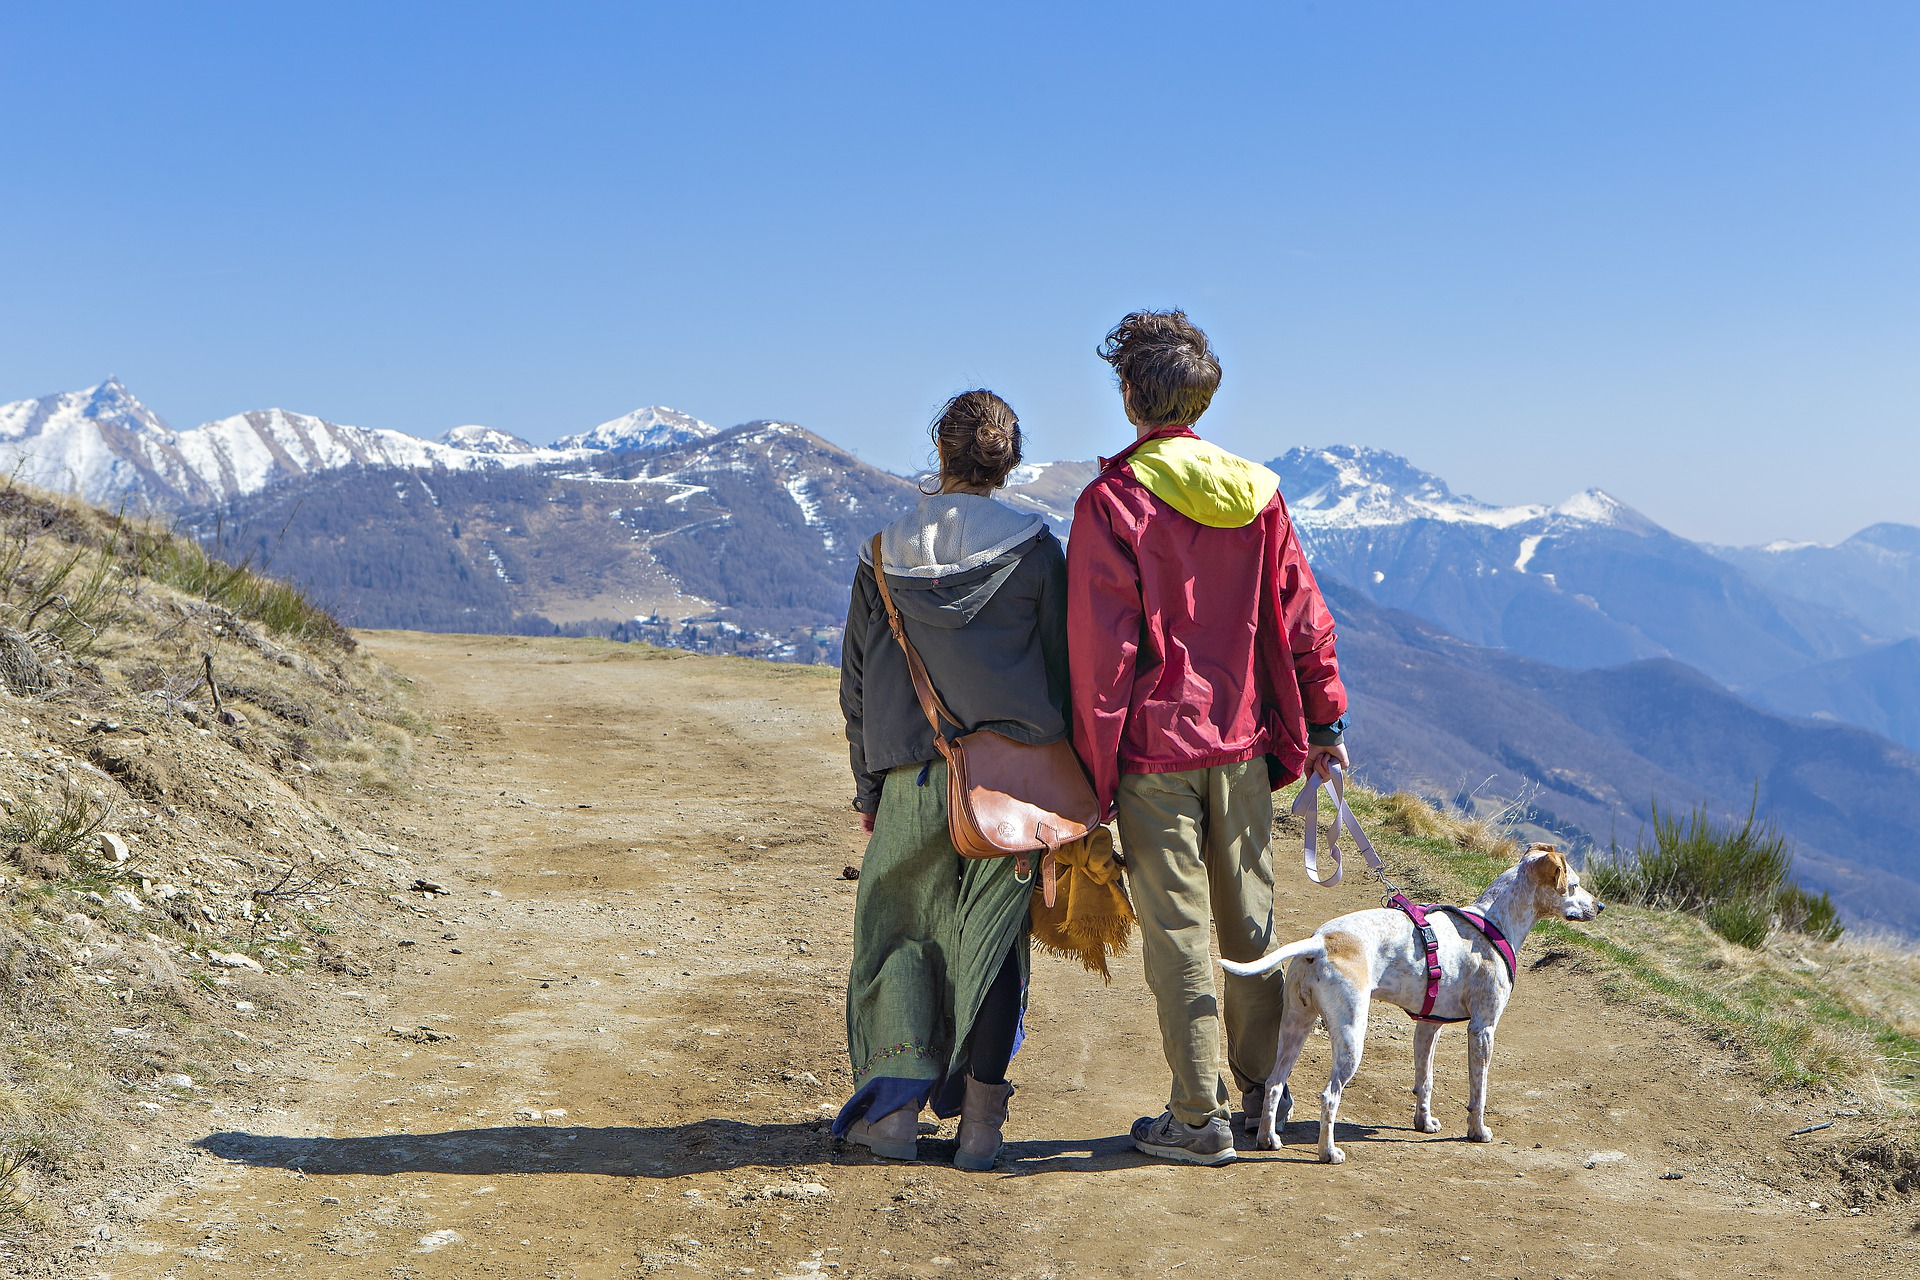

In [ ]:
img1_url = "../input/images/img1.jpg"
display.Image(img1_url,width=500)

In [ ]:
with open(img1_url, 'rb') as img:
    text_ = describeImage(img)
    print(text_)

a couple of people walking a dog on a trail with mountains in the background


**Imagem 2**

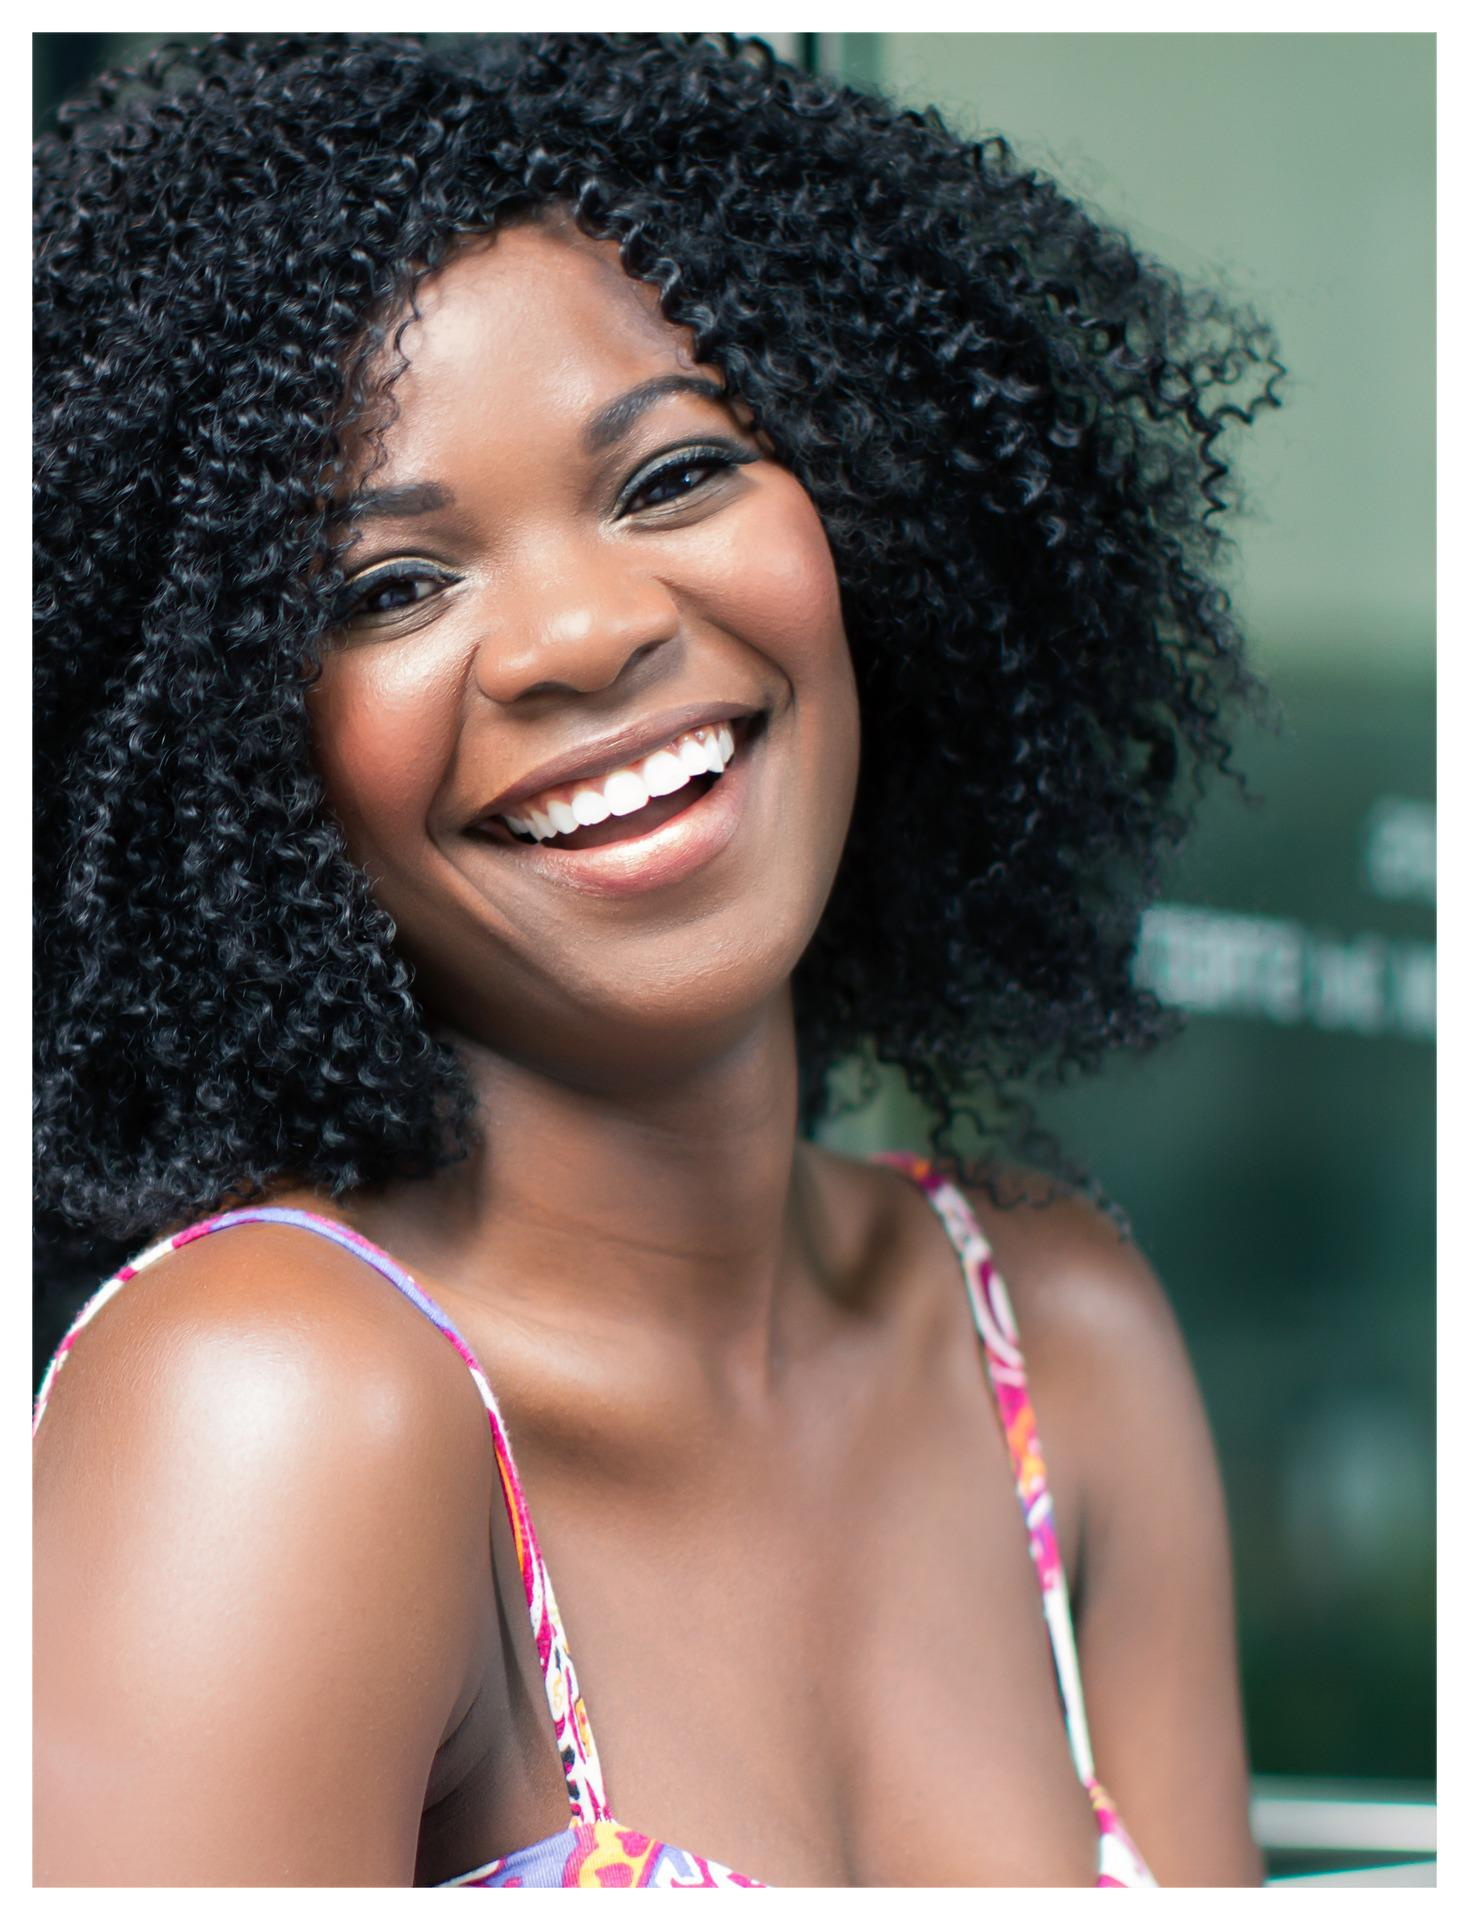

In [ ]:
img2_url = "../input/images/img2.jpg"
display.Image(img2_url,width=200)

In [ ]:
with open(img2_url, 'rb') as img:
    text_ = describeImage(img)
    print(text_)

a woman with curly hair


**Imagem 3**

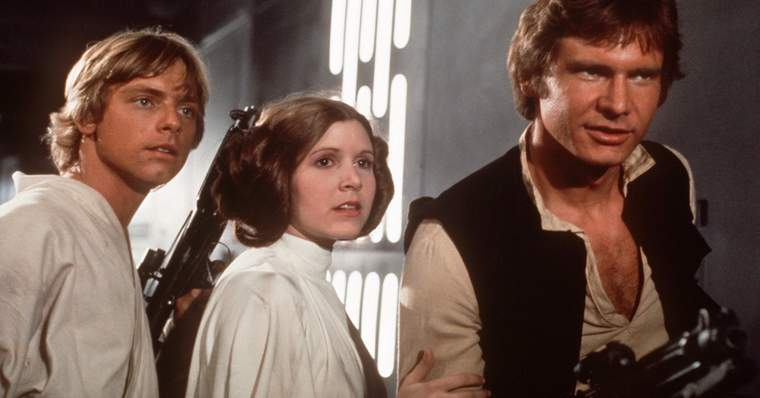

In [ ]:
img3_url = "../input/images/img3.jpeg"
display.Image(img3_url,width=500)

In [ ]:
with open(img3_url, 'rb') as img:
    text_ = describeImage(img)
    print(text_)

Harrison Ford, Mark Hamill, Carrie Fisher posing for the camera
